In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [23]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Krish\Coding_Related\SkillDunia\Artificial Intelligence\Machine failure prediction - Major project\data (1).csv")
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [24]:
df.shape

(944, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [26]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [27]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [28]:
df['fail'].value_counts()

fail
0    551
1    393
Name: count, dtype: int64

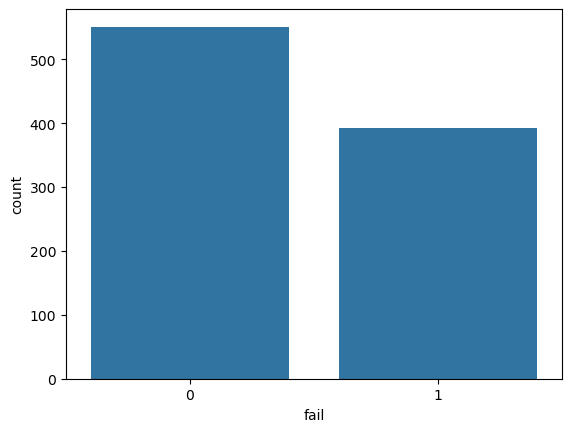

In [29]:
sns.countplot(x='fail', data=df)
plt.show()

In [42]:
sample_failure = np.array([[500, 3, 450, 850, 60, 300, 4800, 110, 140]])
sample_failure_scaled = scaler.transform(sample_failure)
failure_prob = model.predict_proba(sample_failure_scaled)
print("Probability of No Failure:", failure_prob[0][0])
print("Probability of Failure:", failure_prob[0][1])

Probability of No Failure: 0.55
Probability of Failure: 0.45


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
X = df.drop('fail', axis=1)
y = df['fail']

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8783068783068783

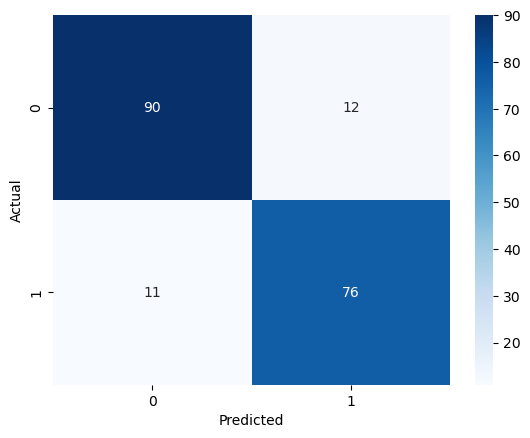

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



In [51]:
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
5,VOC,0.431135
2,AQ,0.189150
3,USS,0.132977
4,CS,0.063121
0,footfall,0.048522
6,RP,0.045793
8,Temperature,0.042877
7,IP,0.024642
1,tempMode,0.021782


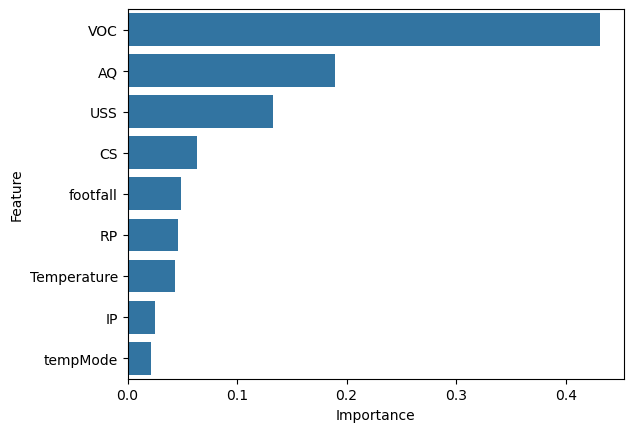

In [52]:
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.show()

In [53]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.8783068783068783)

In [54]:
sample_no_failure = np.array([[120, 1, 80, 250, 15, 60, 1200, 25, 55]])
sample_failure_scaled = scaler.transform(sample_failure)
prediction = model.predict(sample_failure_scaled)
probability = model.predict_proba(sample_failure_scaled)
if prediction[0] == 1:
    print("Machine Failure Predicted")
    print("Failure Probability:", probability[0][1])
else:
    print("No Machine Failure Predicted")
    print("Failure Probability:", probability[0][1])

No Machine Failure Predicted
Failure Probability: 0.45


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
sample_failure = np.array([[500, 3, 450, 850, 60, 300, 4800, 110, 140]])
sample_failure_scaled = scaler.transform(sample_failure)
prediction = model.predict(sample_failure_scaled)
probability = model.predict_proba(sample_failure_scaled)
if prediction[0] == 1:
    print("Machine Failure Predicted")
    print("Failure Probability:", probability[0][1])
else:
    print("No Machine Failure Predicted")
    print("Failure Probability:", probability[0][1])

No Machine Failure Predicted
Failure Probability: 0.45


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
